# Locally Weighted Regression

### 1) Read and Normalise the Dataset
### 2) Generate W for Every Query Point !
### 3) No Training is Involved, Directly Make Predictions Using Closed Form Solution We Derived !
### (X'WX) inv * (X'WY) where X' is X_Transpose
### 4) Find the Best Value of Tau (Bandwidth Parameter) [Cross Validation]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dfx = pd.read_csv("Dataset/weightedX.csv")
dfy = pd.read_csv("Dataset/weightedY.csv")

In [3]:
X = dfx.values
Y = dfy.values

print(X.shape, Y.shape)

(99, 1) (99, 1)


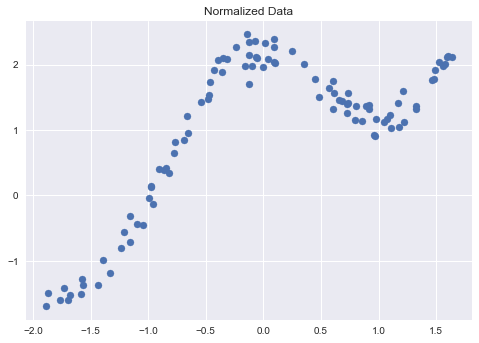

In [4]:
# Normalise the Data
u = X.mean()
std = X.std()
X = (X-u)/std

# Visualise
plt.style.use('seaborn')
plt.title("Normalized Data")
plt.scatter(X, Y)
plt.show()

In [5]:
# Compute Theta for Every Query Point in X_Test
# No Generic Theta, Non Parametric

## Find Out W (m x m) Diagonal Matrix

In [6]:
print(type(np.eye(5)))
print(type(np.mat(np.eye(5))))

<class 'numpy.ndarray'>
<class 'numpy.matrix'>


In [7]:
# a*b --> a, b --> Matrices --> Matrix Multiplication
# a*b --> a, b --> Arrays   --> Element Wise Multiplication (Have To Use np.dot())

In [8]:
def getW(query_point, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x), (xi-x).T)/(-2 * tau * tau))
    return W

In [9]:
X = np.mat(X)
Y = np.mat(Y)
W = getW(-1, X, 0.5)
M = X.shape[0]
print(W.shape)
# print(W)

(99, 99)


## Make Predictions

In [10]:
def predict(X, Y, query_x, tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X, ones))
    qx = np.mat([query_x, 1])
    W = getW(qx, X_, tau)
    
    # Theta -> "(X'WX)inv * X'WY"
    theta = np.linalg.pinv(X_.T*(W*X_)) * (X_.T*(W*Y))
    
    pred = np.dot(qx, theta)
    
    return theta, pred

In [11]:
# Example
theta, pred = predict(X,Y,1.0,1.0)
print(theta) 
print(pred)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


## Visualise The Predictions and Analyse

In [12]:
def plotPrediction(tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []
    for xq in X_test:
        theta, pred = predict(X, Y, xq, tau)
        Y_test.append(pred[0][0])
    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO = np.array(Y)
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO, YO)
    plt.scatter(X_test, Y_test, color='red')
    plt.show()

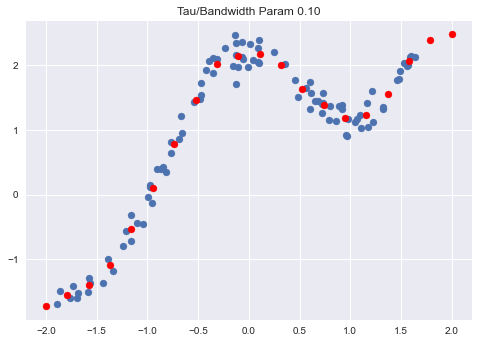

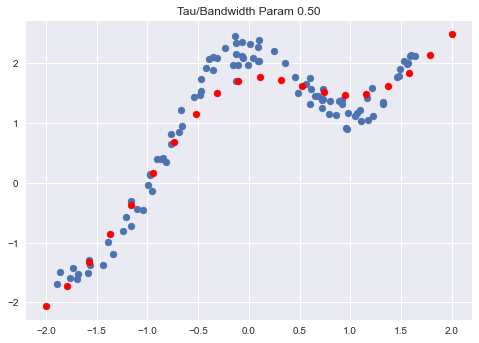

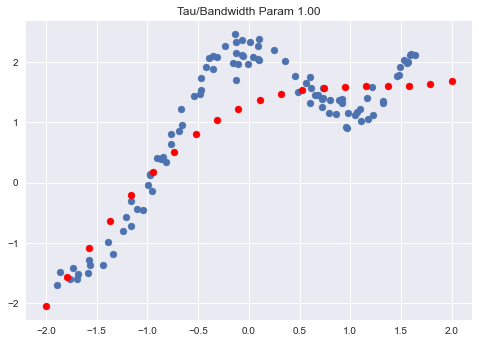

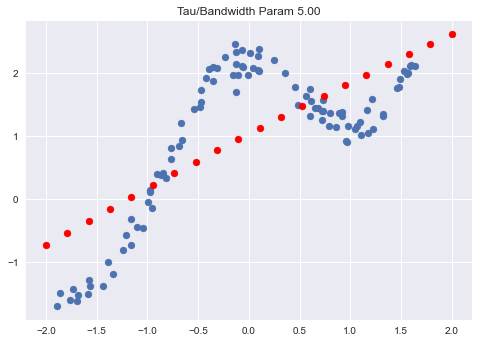

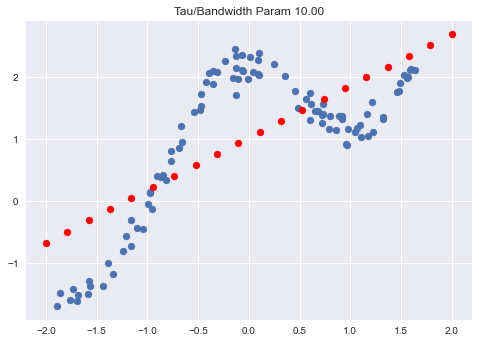

In [13]:
taus = [0.1, 0.5, 1, 5, 10]
for t in taus:
    plotPrediction(t)